## SpaCy Introduction for NLP | Rule Based Phrase Text Extraction and Matching

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

In [1]:
# !pip install -U spacy

In [2]:
# !pip install -U spacy-lookups-data

In [3]:
# !python -m spacy download en_core_web_sm

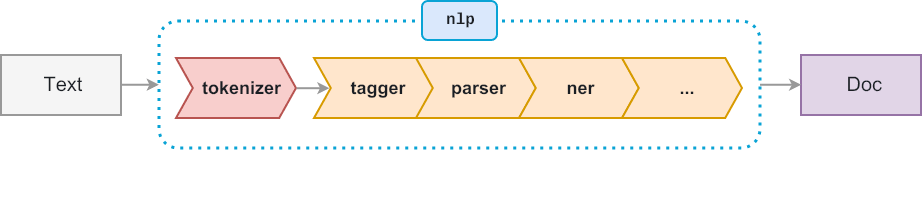

### Rule-based matching 

### Token-based matching 

#### Adding patterns 

Let’s say we want to enable spaCy to find a combination of three tokens:

1. A token whose lowercase form matches “hello”, e.g. “Hello” or “HELLO”.
2. A token whose `is_punct` flag is set to `True`, i.e. any punctuation.
3. A token whose lowercase form matches “world”, e.g. “World” or “WORLD”.

`[{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]`

When writing patterns, keep in mind that each dictionary represents one token. If spaCy’s tokenization doesn’t match the tokens defined in a pattern, the pattern is not going to produce any results. When developing complex patterns, make sure to check examples against spaCy’s tokenization

In [4]:
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
doc = nlp('Hello World!')

In [7]:
doc

Hello World!

In [8]:
for token in doc:
    print(token)

Hello
World
!


##### For spacy creating matcher and pattern for regular expression

In [9]:
pattern = [{"LOWER": "hello", 'OP':'?'}, {"IS_PUNCT": True, 'OP':'?'}, {"LOWER": "world"}]

In [10]:
matcher = Matcher(nlp.vocab)
matcher.add('HelloWorldFinder', None, pattern)#(Any name,a call back function, pattern )

In [11]:
doc = nlp("Hello, world!")

In [12]:
matches = matcher(doc)

In [13]:
matches #match id, start,end

[(14022650268102919206, 0, 3),
 (14022650268102919206, 1, 3),
 (14022650268102919206, 2, 3)]

In [14]:
for token in doc:
    print(token)

Hello
,
world
!


###### 2. Lets create a function to find all details about matcher i.e, match_id, string_id, start, end, span.text

In [15]:
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(match_id, string_id, start, end, span.text)

14022650268102919206 HelloWorldFinder 0 3 Hello, world
14022650268102919206 HelloWorldFinder 1 3 , world
14022650268102919206 HelloWorldFinder 2 3 world


##### https://explosion.ai/demos/matcher 

### Regular Expression 

In some cases, only matching tokens and token attributes isn’t enough – for example, you might want to match different spellings of a word, without having to add a new pattern for each spelling.

#### Identifiers 

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >\d</span></td><td>A digit</td><td>file_\d\d</td><td>file_25</td></tr>

<tr ><td><span >\w</span></td><td>Alphanumeric</td><td>\w-\w\w\w</td><td>A-b_1</td></tr>



<tr ><td><span >\s</span></td><td>White space</td><td>a\sb\sc</td><td>a b c</td></tr>



<tr ><td><span >\D</span></td><td>A non digit</td><td>\D\D\D</td><td>ABC</td></tr>

<tr ><td><span >\W</span></td><td>Non-alphanumeric</td><td>\W\W\W\W\W</td><td>*-+=)</td></tr>

<tr ><td><span >\S</span></td><td>Non-whitespace</td><td>\S\S\S\S</td><td>Yoyo</td></tr></table>

### Quantifiers

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >+</span></td><td>Occurs one or more times</td><td>	Version \w-\w+</td><td>Version A-b1_1</td></tr>

<tr ><td><span >{3}</span></td><td>Occurs exactly 3 times</td><td>\D{3}</td><td>abc</td></tr>



<tr ><td><span >{2,4}</span></td><td>Occurs 2 to 4 times</td><td>\d{2,4}</td><td>123</td></tr>



<tr ><td><span >{3,}</span></td><td>Occurs 3 or more</td><td>\w{3,}</td><td>anycharacters</td></tr>

<tr ><td><span >\*</span></td><td>Occurs zero or more times</td><td>A\*B\*C*</td><td>AAACC</td></tr>

<tr ><td><span >?</span></td><td>Once or none</td><td>plurals?</td><td>plural</td></tr></table>

#### Example

In [16]:
text = "my phone number is 1256. Ohh its wrong! Correct one is 1256348790. call me!"

In [17]:
import re

In [18]:
re.search(r'\d{10}', text)#only 10 digit number to be find out
#start and end position and matched keyword is also given like that

<re.Match object; span=(55, 65), match='1256348790'>

In [19]:
re.search(r'\d{4}', text)#Only 4 digit words 

<re.Match object; span=(19, 23), match='1256'>

In [20]:
text="123  45455 789956665565 122233 12"

In [21]:
re.findall(r'\d{3,10}', text)#findall searches throughout the text

['123', '45455', '7899566655', '122233']

In [22]:
text = "my phone number is 1256. Ohh its wrong! Correct one is 1256348790. call me!"

In [23]:
re.findall(r'\w{4,}', text)

['phone', 'number', '1256', 'wrong', 'Correct', '1256348790', 'call']

In [24]:
re.match(r'\w{2,10}', text)

<re.Match object; span=(0, 2), match='my'>

###### Difference between search, match and between:
    
    match--> finds only once and in the beginning only
    search-->finds anywhere but only once
    findall-->finds throughout the text and serches many times

#####  3. wildcard text 

In [25]:
re.findall(r'c..', text)#not a wildcard #only any word starting with 'c'

['ct ', 'cal']

In [26]:
text = "this is cat but not that. i want hat and cat na both"

In [27]:
re.findall(r'.a.', text)#not a wildcard #only any word which contains 'a'

['cat', 'hat', 'wan', 'hat', ' an', 'cat', 'na ']

In [28]:
text = 'hi thanks for watching <3'

In [29]:
re.findall(r'\d$', text)#searches everywhere many times

['3']

In [30]:
re.search(r'\d$', text)#finds only once #pattern is ending with 3

<re.Match object; span=(24, 25), match='3'>

In [31]:
text = '3 hi thanks for watching <3'

In [32]:
re.findall(r'^\d', text)#starting with '3'

['3']

#### Exclusion 

In [33]:
text

'3 hi thanks for watching <3'

In [34]:
re.findall(r'[^\d]+', text) #Exclude digits

[' hi thanks for watching <']

In [35]:
text = 'hi 33 thanks for watching <3'

In [36]:
re.findall(r'[^\D]+', text)#Not from start

['33', '3']

In [37]:
text = "you can get free-videos on Google-youtube"

In [38]:
re.findall(r'[\w]+-[\w]+', text)#words containing hyphen(-)

['free-videos', 'Google-youtube']

### Regular Expression in SpaCy 

Match different spellings of token texts `pattern = [{"TEXT": {"REGEX": "deff?in[ia]tely"}}]`


Match tokens with fine-grained POS tags starting with 'V' `pattern = [{"TAG": {"REGEX": "^V"}}]`

In [39]:
text = "Google announced a new Pixel at Google I/O Google I/O is a great place to get all updates from Google."

In [40]:
text

'Google announced a new Pixel at Google I/O Google I/O is a great place to get all updates from Google.'

In [41]:
pattern = [{'TEXT':'Google'}, {'TEXT': 'I'}, {'TEXT':'/'}, {'TEXT':'O'}]

In [42]:
def callback_method(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    entity = doc[start:end]
    print(entity.text)

In [43]:
matcher = Matcher(nlp.vocab)
matcher.add('Google', callback_method, pattern)

In [44]:
doc = nlp(text)

In [45]:
matcher(doc)

Google I/O
Google I/O


[(11578853341595296054, 6, 10), (11578853341595296054, 10, 14)]

#### Find word Google 

In [46]:
pattern = [{'TEXT':'Google'}, {'TEXT': 'I', 'OP': '?'}, {'TEXT':'/', 'OP': '?'}, {'TEXT':'O', 'OP': '?'}]

In [47]:
def callback_method(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    entity = doc[start:end]
    print(entity.text)

In [48]:
matcher = Matcher(nlp.vocab)
matcher.add('Google', callback_method, pattern)

In [49]:
doc = nlp(text)

In [ ]:
matcher(doc)

### PArt 2

## Using Linguistic Annotations 

Let’s say you’re analyzing user comments and you want to find out what people are saying about Facebook. You want to start off by finding adjectives following “Facebook is” or “Facebook was”. This is obviously a very rudimentary solution, but it’ll be fast, and a great way to get an idea for what’s in your data. Your pattern could look like this:

`[{"LOWER": "facebook"}, {"LEMMA": "be"}, {"POS": "ADV", "OP": "*"}, {"POS": "ADJ"}]`

This translates to a token whose lowercase form matches “facebook” (like Facebook, facebook or FACEBOOK), followed by a token with the lemma “be” (for example, is, was, or ‘s), followed by an optional adverb, followed by an adjective.

https://spacy.io/api/annotation

In [50]:
matcher = Matcher(nlp.vocab)#loading nlp vocabulary to matcher

In [51]:
matched_sents = []#breaking a doc into sentences based on matching

In [52]:
pattern = [{"LOWER": "facebook"}, {"LEMMA": "be"}, {"POS": "ADV", "OP": "*"}, {"POS": "ADJ"}]#pattern creation in spacy

In [53]:
def callback_method_fb(matcher, doc, i, matches):
    matched_id, start, end = matches[i]
    span = doc[start:end]
    sent = span.sent
    
    match_ents = [{
        'start':span.start_char - sent.start_char, # a dictionary to
        'end': span.end_char - sent.start_char,
        'label': 'MATCH'
    }]
    
    matched_sents.append({'text': sent.text, 'ents':match_ents})

In [54]:
matcher.add("fbreviewer", callback_method_fb, pattern)#using matcher to see the reviews

In [55]:
doc = nlp("I'd say that Facebook is evil. – Facebook is pretty cool, right?")

In [56]:
matches = matcher(doc)

In [57]:
matches

[(8979314357719909335, 4, 7), (8979314357719909335, 9, 13)]

In [58]:
matched_sents

[{'text': "I'd say that Facebook is evil.",
  'ents': [{'start': 13, 'end': 29, 'label': 'MATCH'}]},
 {'text': '– Facebook is pretty cool, right?',
  'ents': [{'start': 2, 'end': 25, 'label': 'MATCH'}]}]

In [59]:
displacy.render(matched_sents, style='ent', manual = True)

### Getting phone numbers 

### Phone numbers 

Phone numbers can have many different formats and matching them is often tricky. During tokenization, spaCy will leave sequences of numbers intact and only split on whitespace and punctuation. This means that your match pattern will have to look out for number sequences of a certain length, surrounded by specific punctuation – depending on the national conventions.

You want to match like this `(123) 4567 8901 or (123) 4567-8901`

`[{"ORTH": "("}, {"SHAPE": "ddd"}, {"ORTH": ")"}, {"SHAPE": "dddd"}, {"ORTH": "-", "OP": "?"}, {"SHAPE": "dddd"}]`

In [60]:
pattern = [{"ORTH": "("}, {"SHAPE": "ddd"}, {"ORTH": ")"}, {"SHAPE": "dddd"}, {"ORTH": "-", "OP": "?"}, {"SHAPE": "dddd"}]
#pattern for phone numbers

In [61]:
matcher = Matcher(nlp.vocab)
matcher.add("PhoneNumber", None, pattern)

In [66]:
doc = nlp("Call me at (123) 4560-7890 and (990) 3453-4325")

In [67]:
print([t.text for t in doc])

['Call', 'me', 'at', '(', '123', ')', '4560', '-', '7890', 'and', '(', '990', ')', '3453', '-', '4325']


In [68]:
matches = matcher(doc) #applying matcher over the text 
matches

[(7978097794922043545, 3, 9), (7978097794922043545, 10, 16)]

In [69]:
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text) #this give the number

(123) 4560-7890
(990) 3453-4325


#### Email Address Matching 

In [70]:
pattern = [{"TEXT": {"REGEX": "[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+"}}]#pattern for email id

In [71]:
matcher = Matcher(nlp.vocab)
matcher.add("Email", None, pattern)

In [72]:
text = "Email me at kishan.pandey1352@gmail.com and ks5pandey@gmail.com amd ks5pandey@hotmail.com or kishan.@medtronic.com "

In [73]:
doc = nlp(text)

In [74]:
matches = matcher(doc)

In [75]:
matches#match id, start, end

[(11010771136823990775, 3, 4),
 (11010771136823990775, 5, 6),
 (11010771136823990775, 7, 8),
 (11010771136823990775, 9, 10)]

In [76]:
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text)#this brings out all the email ids from the document

kishan.pandey1352@gmail.com
ks5pandey@gmail.com
ks5pandey@hotmail.com
kishan.@medtronic.com


### Hashtags and emoji on social media 

Social media posts, especially tweets, can be difficult to work with. They’re very short and often contain various emoji and hashtags. By only looking at the plain text, you’ll lose a lot of valuable semantic information.

Let’s say you’ve extracted a large sample of social media posts on a specific topic, for example posts mentioning a brand name or product. As the first step of your data exploration, you want to filter out posts containing certain emoji and use them to assign a general sentiment score, based on whether the expressed emotion is positive or negative, e.g. 😀 or 😞. You also want to find, merge and label hashtags like #MondayMotivation, to be able to ignore or analyze them later.

By default, spaCy’s tokenizer will split emoji into separate tokens. This means that you can create a pattern for one or more emoji tokens. Valid hashtags usually consist of a #, plus a sequence of ASCII characters with no whitespace, making them easy to match as well.

In [77]:
pos_emoji = ["😀", "😃", "😂", "🤣", "😊", "😍"]  # Positive emoji 
neg_emoji = ["😞", "😠", "😩", "😢", "😭", "😒"]  # Negative emoji

In [78]:
pos_emoji

['😀', '😃', '😂', '🤣', '😊', '😍']

In [79]:
# Add patterns to match one or more emoji tokens
pos_patterns = [[{"ORTH": emoji}] for emoji in pos_emoji]
neg_patterns = [[{"ORTH": emoji}] for emoji in neg_emoji]

In [80]:
pos_patterns

[[{'ORTH': '😀'}],
 [{'ORTH': '😃'}],
 [{'ORTH': '😂'}],
 [{'ORTH': '🤣'}],
 [{'ORTH': '😊'}],
 [{'ORTH': '😍'}]]

In [81]:
neg_patterns

[[{'ORTH': '😞'}],
 [{'ORTH': '😠'}],
 [{'ORTH': '😩'}],
 [{'ORTH': '😢'}],
 [{'ORTH': '😭'}],
 [{'ORTH': '😒'}]]

In [82]:
def label_sentiment(matcher, doc, i, matches): # a function to compare the emojis as positive or ngative
    match_id, start, end = matches[i]
    if doc.vocab.strings[match_id] == 'HAPPY':
        doc.sentiment += 0.1
    elif doc.vocab.strings[match_id] == 'SAD':
        doc.sentiment -= 0.1

In [83]:
matcher = Matcher(nlp.vocab)

In [84]:
matcher.add("HAPPY", label_sentiment, *pos_patterns)
matcher.add('SAD', label_sentiment, *neg_patterns)

In [85]:
matcher.add('HASHTAG', None, [{'TEXT': '#'}, {'IS_ASCII': True}]) #no sentiment for '#'

In [86]:
doc = nlp("Hello world 😀 #BSE_INDIA")

In [87]:
matches = matcher(doc)

In [88]:
for match_id, start, end in matches:
    string_id = doc.vocab.strings[match_id]  # Look up string ID
    span = doc[start:end]
    print(string_id, span.text)

HAPPY 😀
HASHTAG #BSE_INDIA


### Efficient phrase matching

If you need to match large terminology lists, you can also use the PhraseMatcher and create Doc objects instead of token patterns, which is much more efficient overall. The Doc patterns can contain single or multiple tokens.



In [89]:
from spacy.matcher import PhraseMatcher

In [90]:
matcher = PhraseMatcher(nlp.vocab)

In [91]:
terms = ['BARAC OBAMA', 'ANGELA MERKEL', 'WASHINGTON D.C.']#terms to be matched in a given document

In [92]:
pattern = [nlp.make_doc(text) for text in terms]

In [99]:
pattern #pattern created out the terms

[BARAC OBAMA, ANGELA MERKEL, WASHINGTON D.C.]

In [94]:
matcher.add('term', None, *pattern)

In [104]:
doc = nlp("German Chancellor ANGELA MERKEL and US President BARAC OBAMA "
          "converse in the Oval Office inside the White House in  WASHINGTON D.C.")

In [105]:
doc

German Chancellor ANGELA MERKEL and US President BARAC OBAMA converse in the Oval Office inside the White House in  WASHINGTON D.C.

In [106]:
matches = matcher(doc)

In [107]:
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text) This gives out which pattern is present 

ANGELA MERKEL
BARAC OBAMA
WASHINGTON D.C.


In [108]:
matches #match id, start, end

[(4519742297340331040, 2, 4),
 (4519742297340331040, 7, 9),
 (4519742297340331040, 20, 22)]

### Custom Rule Based Entity Recognition

The EntityRuler is an exciting new component that lets you add named entities based on pattern dictionaries, and makes it easy to combine rule-based and statistical named entity recognition for even more powerful models.

##### Entity Patterns 

Entity patterns are dictionaries with two keys: "label", specifying the label to assign to the entity if the pattern is matched, and "pattern", the match pattern. The entity ruler accepts two types of patterns:

- Phrase Pattern
`{"label": "ORG", "pattern": "Apple"}`
- Token Pattern `{"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}]}`

##### Using the entity ruler 

The EntityRuler is a pipeline component that’s typically added via nlp.add_pipe. When the nlp object is called on a text, it will find matches in the doc and add them as entities to the doc.ents, using the specified pattern label as the entity label.

https://spacy.io/api/annotation#named-entities

In [109]:
from spacy.pipeline import EntityRuler

In [110]:
nlp = spacy.load('en_core_web_sm') #loading small english library of Spacy

In [111]:
ruler = EntityRuler(nlp)

In [112]:
patterns = [{"label": "ORG", "pattern": "TCS"},
            {"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}]},
             {"label": "GPE", "pattern": "Siwan"}]

In [113]:
patterns# my custom patterns are added for future NER in NLP 

[{'label': 'ORG', 'pattern': 'TCS'},
 {'label': 'GPE', 'pattern': [{'LOWER': 'san'}, {'LOWER': 'francisco'}]},
 {'label': 'GPE', 'pattern': 'Siwan'}]

In [114]:
ruler.add_patterns(patterns)#creating rule using custom patterns

In [115]:
nlp.add_pipe(ruler)

In [116]:
doc = nlp("I work in TCS and live in Siwan and have a longing to visit San Francisco.")

In [117]:
doc

I work in TCS and live in Siwan and have a longing to visit San Francisco.

In [118]:
for ent in doc.ents:
    print(ent.text, ent.label_)

TCS ORG
Siwan GPE
San Francisco GPE
